In [105]:
import pandas as pd

df = pd.read_csv('train_without_noise.csv')

In [106]:
df = df.drop('id', axis=1)
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [107]:
df.shape

(28895, 291)

In [108]:
# Ключевая метрика оптимизации RMSLE

import numpy as np

df = df.assign(log_price_doc=np.log1p(df['price_doc']))
df = df.drop('price_doc', axis=1)

In [109]:
# Числовые столбцы

numeric_columns = df.loc[:, df.dtypes!='object'].columns
print(len(numeric_columns))
df.describe()

275


,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
count,28895.000000,23458.000000,28729.000000,19335.000000,19335.000000,16189.000000,19335.000000,19335.000000,16110.000000,2.889500e+04,...,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000,28895.000000
mean,53.849663,34.143235,7.610150,13.448823,1.855443,1903.283649,1.913680,6.261340,2.148355,1.691485e+07,...,32.320921,10.841287,1.777470,15.210867,30.536183,0.442360,8.724935,53.770479,6.120817,15.602825
std,38.656434,52.158376,5.274859,6.121216,1.490686,395.367811,0.852313,4.579835,0.869019,1.971843e+07,...,73.248134,28.320558,5.414389,29.007667,47.163909,0.610575,20.504902,46.031962,4.885734,0.607187
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1967.000000,1.000000,1.000000,1.000000,7.128794e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,12.000000,1.000000,15.371548
50%,48.000000,30.000000,6.000000,14.000000,1.000000,1979.000000,2.000000,6.000000,2.000000,1.007156e+07,...,9.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,49.000000,5.000000,15.648092
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2004.000000,2.000000,9.000000,3.000000,1.752651e+07,...,22.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,11.000000,15.926036
max,5326.000000,7478.000000,44.000000,117.000000,6.000000,4965.000000,19.000000,123.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,18.526041


In [110]:
# Заполнить пропуски в числовых столбцах средним значением столбцов

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [111]:
df[numeric_columns].isna().sum()

full_sq               0
life_sq               0
floor                 0
max_floor             0
material              0
                     ..
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
log_price_doc         0
Length: 275, dtype: int64

In [112]:
df[numeric_columns].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
full_sq,1.000000,0.152910,0.090414,0.090164,0.018976,-0.010781,0.323344,0.091720,-0.032119,0.057427,...,0.039385,0.040449,0.044048,0.026862,0.028665,0.021739,0.030500,0.001305,-0.040972,0.258885
life_sq,0.152910,1.000000,0.040315,0.044707,0.012634,-0.034406,0.170646,0.017752,-0.059560,0.045473,...,0.025921,0.028396,0.031476,0.016575,0.016827,0.011079,0.020805,-0.011662,-0.043893,0.118044
floor,0.090414,0.040315,1.000000,0.468960,-0.002976,-0.012661,-0.006191,0.016786,-0.076500,-0.007820,...,-0.035549,-0.029550,-0.022950,-0.044690,-0.046119,-0.015043,-0.044297,-0.109781,-0.131848,0.109658
max_floor,0.090164,0.044707,0.468960,1.000000,0.008981,-0.024650,-0.025745,0.054480,-0.156197,0.001272,...,-0.051882,-0.041464,-0.034764,-0.064833,-0.065290,-0.051601,-0.060510,-0.155606,-0.183680,0.106234
material,0.018976,0.012634,-0.002976,0.008981,1.000000,0.052935,-0.026594,0.123250,-0.043808,0.016901,...,0.043762,0.038253,0.038909,0.032368,0.037866,0.046740,0.038142,0.080230,0.058906,0.013150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,0.021739,0.011079,-0.015043,-0.051601,0.046740,0.055213,0.054678,0.067483,0.070617,-0.094697,...,0.528316,0.490142,0.479043,0.499749,0.548291,1.000000,0.496684,0.521541,0.241069,0.132602
leisure_count_5000,0.030500,0.020805,-0.044297,-0.060510,0.038142,0.009607,0.049544,-0.020269,-0.005283,-0.190932,...,0.985661,0.974689,0.946579,0.967864,0.974471,0.496684,1.000000,0.807198,0.456769,0.134481
sport_count_5000,0.001305,-0.011662,-0.109781,-0.155606,0.080230,0.098536,0.073626,0.096346,0.138295,-0.409410,...,0.822561,0.776616,0.750436,0.823564,0.846545,0.521541,0.807198,1.000000,0.726287,0.221150
market_count_5000,-0.040972,-0.043893,-0.131848,-0.183680,0.058906,0.131191,0.047571,0.135772,0.195008,-0.442139,...,0.424607,0.372513,0.345033,0.475325,0.508594,0.241069,0.456769,0.726287,1.000000,0.159078


In [113]:
# Функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
public_transport_station_km           public_transport_station_min_walk        1.000000
children_school                       7_14_all                                 1.000000
children_preschool                    0_6_all                                  1.000000
railroad_station_walk_km              railroad_station_walk_min                1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999881
young_female                          0_13_female                              0.999866
young_male                            0_13_male                                0.999858
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

In [114]:
# Удаление коррелирующих столбцов

def correlation(dataset, threshold):

    numeric_df = dataset.select_dtypes(include=[np.number])
    
    col_corr = set()  
    corr_matrix = numeric_df.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]  
                col_corr.add(colname) 
                if colname in dataset.columns:
                    del dataset[colname]

correlation(df, 0.9)

In [115]:
numeric_columns = df.loc[:, df.dtypes!='object'].columns
print(len(numeric_columns))
df.shape

143


(28895, 159)

In [116]:
# Квазиконстантный признаки (дисперсия)

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

df[constant_cols].head()

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0


In [117]:
# Категориальные признаки

categorical_columns = df.loc[:, df.dtypes=='object'].columns
df.describe(include='object')

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,28895,28895,28895,28895,28895,28895,28895,28895,28895,28895,28895,28895,28895,28895,28895,28895
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Nekrasovka,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,147,19343,1511,27080,27277,26686,28600,18263,27825,26427,28037,25968,26791,28139,28031,7843


In [118]:
# OneHot для столбцов с небольшим кол-вом уникальных значений и MeanTarget для остальных

for col in categorical_columns:
    if col != 'timestamp':
        if df[col].nunique() < 5:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
        else:
            mean_target = df.groupby(col)['log_price_doc'].mean()
            df[col] = df[col].map(mean_target)

In [119]:
# Столбец с датами

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

df = df.sort_values('timestamp')

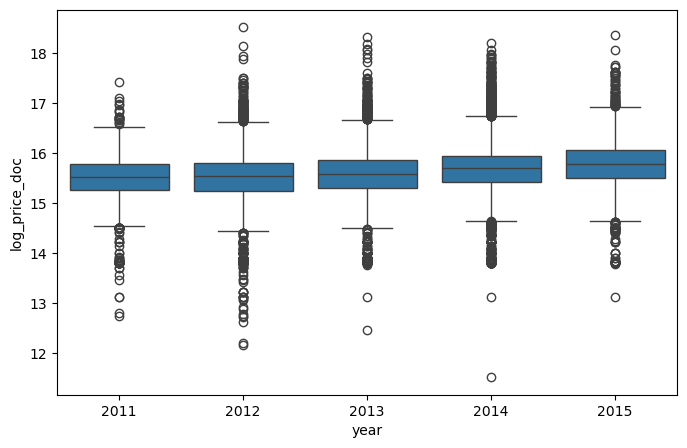

In [120]:
# Столбец Year 

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(8, 5)

sns.boxplot(y='log_price_doc', x=df['year'].astype('category'), data=df)
plt.show()

In [121]:
one_hot = pd.get_dummies(df['year'], prefix='year', drop_first=True).astype(int)
df = pd.concat((df.drop('year', axis=1), one_hot), axis=1)

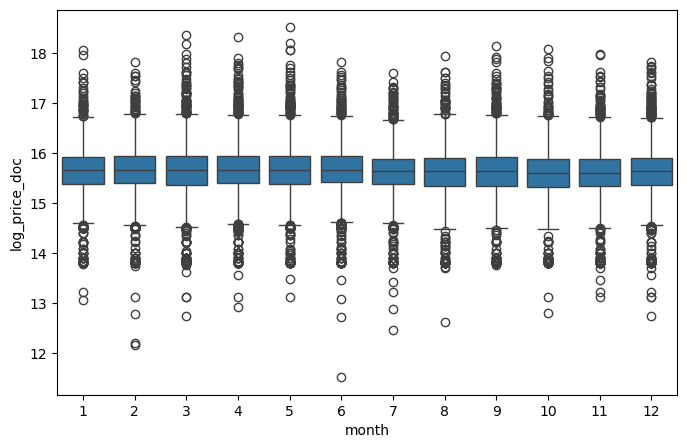

In [122]:
# Столбец Month 

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(8, 5)

sns.boxplot(y='log_price_doc', x=df['month'].astype('category'), data=df)
plt.show()

In [123]:
one_hot = pd.get_dummies(df['month'], prefix='month', drop_first=True).astype(int)
df = pd.concat((df.drop('month', axis=1), one_hot), axis=1)

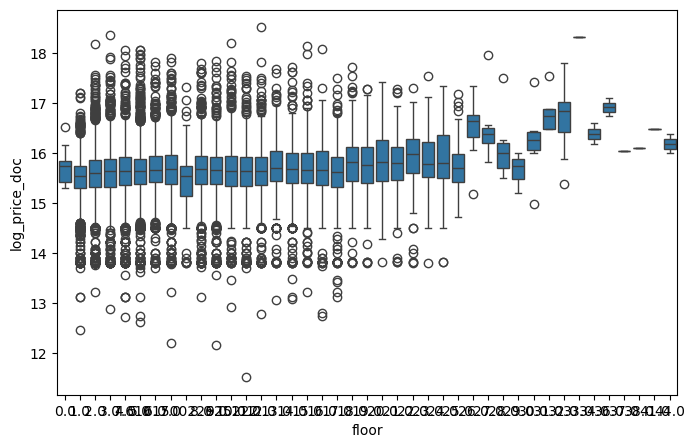

In [126]:
# Столбец Floor 

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(8, 5)

sns.boxplot(y='log_price_doc', x=df['floor'].astype('category'), data=df)
plt.show()

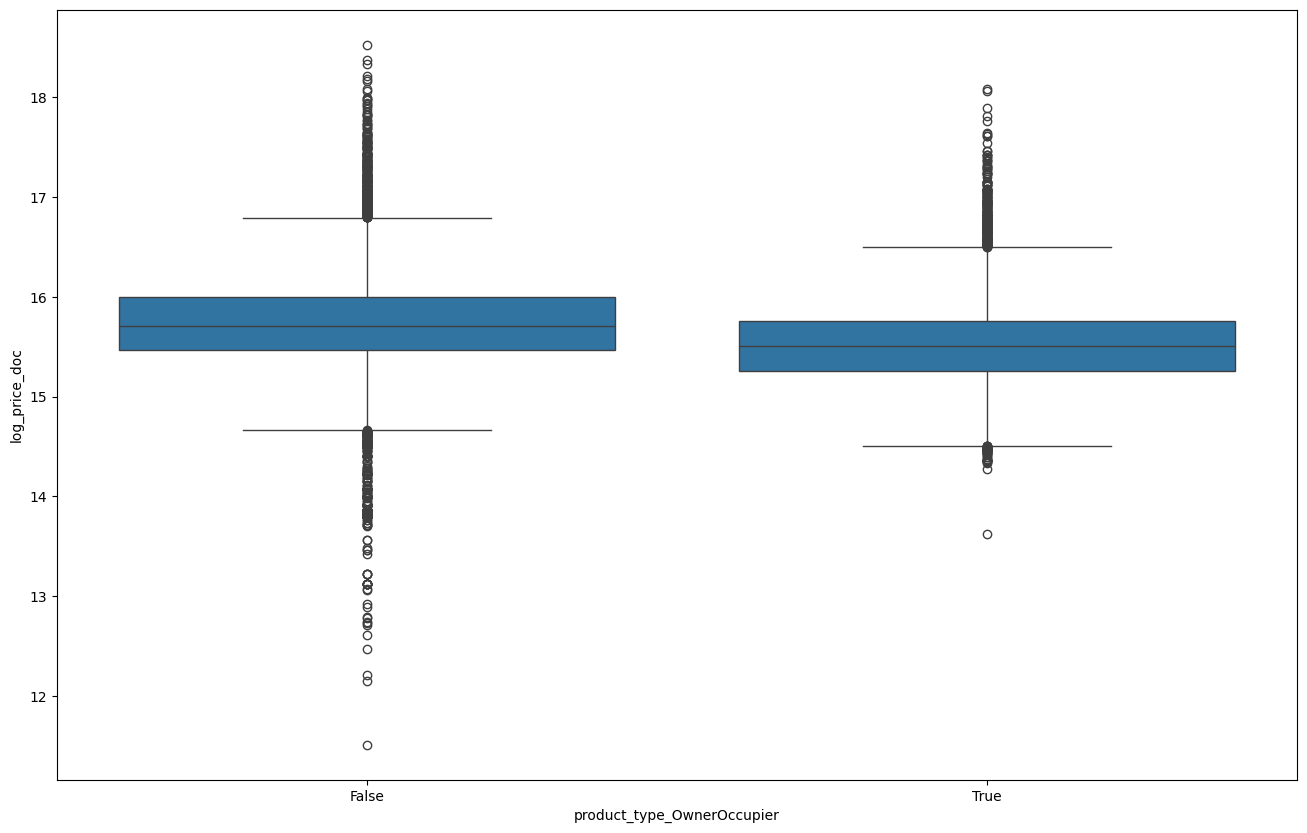

In [127]:
# Распределения таргета по типу недвижимости

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=df['product_type_OwnerOccupier'].astype('category'), data=df)
plt.show()

In [134]:
df = df.drop('timestamp', axis=1)

In [129]:
# Кросс-валидация под капотом

# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression

# X = df.drop('log_price_doc', axis=1)
# Y = df['log_price_doc']

# splitter = TimeSeriesSplit(n_splits=4)

# test_losses = []
# train_losses = []

# for train_index, test_index in splitter.split(X):
#     x_train, x_test = X.values[train_index], X.values[test_index]
#     y_train, y_test = Y.values[train_index], Y.values[test_index]

#     model = LinearRegression()
#     model.fit(x_train, y_train)

#     preds_test = model.predict(x_test)
#     preds_train = model.predict(x_train)

#     error_test = np.mean((preds_test - y_test)**2)
#     error_train = np.mean((preds_train - y_train)**2)

#     test_losses.append(error_test)
#     train_losses.append(error_train)

# print(f'Среднее MSLE на тренировочных фолдах: {np.mean(train_losses).round(3)}')
# print(f'Среднее MSLE на тестовых фолдах: {np.mean(test_losses).round(3)}')

In [135]:
# Кросс-валидация

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

model = LinearRegression()
splitter = TimeSeriesSplit(n_splits=4)

cv_result = cross_validate(model, X, Y, scoring='neg_mean_squared_error', cv=splitter, return_train_score=True)

print(cv_result)
print(f'Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result['train_score'].round(3))}')
print(f'Среднее MSLE на тестовых фолдах: {-np.mean(cv_result['test_score'].round(3))}')

{'fit_time': array([0.10854864, 0.09475732, 0.12781954, 0.18837667]), 'score_time': array([0.00648808, 0.00520015, 0.00790858, 0.00502992]), 'test_score': array([-0.23384456, -1.20699478, -0.24834437, -0.29819083]), 'train_score': array([-0.32623718, -0.26888606, -0.27159346, -0.26416067])}
Среднее MSLE на тренировочных фолдах: 0.28275
Среднее MSLE на тестовых фолдах: 0.49675


In [136]:
# Регуляризация

from sklearn.linear_model import Lasso, Ridge

model_lasso = Lasso(max_iter=100000)

cv_result_lasso = cross_validate(model_lasso, X, Y, scoring='neg_mean_squared_error', cv=splitter, return_train_score=True)
print(cv_result_lasso)
print(f'Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_lasso['train_score'].round(3))}')
print(f'Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_lasso['test_score'].round(3))}')

{'fit_time': array([0.10559678, 0.18771982, 0.30542684, 0.36248684]), 'score_time': array([0.00794864, 0.00499082, 0.00782871, 0.00893879]), 'test_score': array([-0.25626324, -0.82992655, -0.32782571, -0.29354936]), 'train_score': array([-0.3709105 , -0.30876133, -0.32518926, -0.32299342])}
Среднее MSLE на тренировочных фолдах: 0.33199999999999996
Среднее MSLE на тестовых фолдах: 0.427


In [137]:
# Масштабирование и регуляризация

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()),
                 ('Lasso', Lasso(max_iter=100000))])
pipe.fit(X, Y)

print(pipe.predict(X.head(1)))

cv_result_pipe = cross_validate(pipe, X, Y, scoring='neg_mean_squared_error', cv=splitter, return_train_score=True)
print(cv_result_pipe)
print(f'Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score'].round(3))}')
print(f'Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score'].round(3))}')

[15.60282509]
{'fit_time': array([0.06539392, 0.14190125, 0.18730855, 0.24748707]), 'score_time': array([0.04381442, 0.04254293, 0.06845117, 0.06086206]), 'test_score': array([-0.31754872, -0.36298546, -0.3864274 , -0.36064771]), 'train_score': array([-0.43096644, -0.37210109, -0.36765953, -0.37165213])}
Среднее MSLE на тренировочных фолдах: 0.3857499999999999
Среднее MSLE на тестовых фолдах: 0.35700000000000004


In [138]:
# Тюнинг модели (гиперпараметр alpha

from sklearn.model_selection import GridSearchCV

alphas = np.linspace(start=0.01, stop=1, num=30)

param_grid = {'Lasso__alpha': alphas}

search = GridSearchCV(pipe, param_grid, cv=splitter, scoring='neg_mean_squared_error')
search.fit(X, Y)

print(f'Best parameter (CV score={search.best_score_:.5f}):')
print(search.best_params_)

Best parameter (CV score=-0.32584):
{'Lasso__alpha': 0.14655172413793105}


In [139]:
pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.14655172413793105, max_iter=100000))])

In [140]:
cv_result_pipe = cross_validate(pipe, X, Y, scoring='neg_mean_squared_error', cv=splitter, return_train_score=True)
print(cv_result_pipe)
print(f'Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score'].round(3))}')
print(f'Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score'].round(3))}')

{'fit_time': array([0.07480502, 0.11622977, 0.18219161, 0.2519021 ]), 'score_time': array([0.05228066, 0.03923917, 0.06274438, 0.06621695]), 'test_score': array([-0.28321277, -0.36096836, -0.35373383, -0.30544742]), 'train_score': array([-0.39883794, -0.33706804, -0.34107129, -0.33233597])}
Среднее MSLE на тренировочных фолдах: 0.35225
Среднее MSLE на тестовых фолдах: 0.32575


### Анализ выбросов

In [141]:
data = pd.concat((X, Y), axis=1)

In [142]:
top_quantile = data['log_price_doc'].quantile(0.975)
low_quantile = data['log_price_doc'].quantile(0.025)

print(f'Топ 2,5% значение таргета: {top_quantile.round(2)}')
print(f'Топ 97,5% значение таргета: {low_quantile.round(2)}')

Топ 2,5% значение таргета: 16.68
Топ 97,5% значение таргета: 13.82


In [143]:
data = data[(data['log_price_doc']>low_quantile) & (data['log_price_doc']<top_quantile)]
X_new, Y_new = data.drop('log_price_doc', axis=1), data['log_price_doc']

In [144]:
new_splitter = TimeSeriesSplit(n_splits=4)

param_grid = {'Lasso__alpha': alphas}

search = GridSearchCV(pipe, param_grid, cv=new_splitter, scoring='neg_mean_squared_error')
search.fit(X_new, Y_new)

print(f'Best parameter (CV score={search.best_score_:.5f}):')
print(search.best_params_)

Best parameter (CV score=-0.17692):
{'Lasso__alpha': 0.07827586206896552}


In [145]:
pipe.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

Pipeline(steps=[('scaler', StandardScaler()),
                ('Lasso', Lasso(alpha=0.07827586206896552, max_iter=100000))])

In [146]:
cv_result_pipe = cross_validate(pipe, X_new, Y_new, scoring='neg_mean_squared_error', cv=new_splitter, return_train_score=True)
print(cv_result_pipe)
print(f'Среднее MSLE на тренировочных фолдах: {-np.mean(cv_result_pipe['train_score'].round(3))}')
print(f'Среднее MSLE на тестовых фолдах: {-np.mean(cv_result_pipe['test_score'].round(3))}')

{'fit_time': array([0.07258487, 0.11879206, 0.16725302, 0.20936918]), 'score_time': array([0.03874636, 0.03792572, 0.04431129, 0.0510366 ]), 'test_score': array([-0.15525868, -0.22179677, -0.17200047, -0.1586062 ]), 'train_score': array([-0.17927565, -0.16447819, -0.16857154, -0.16598293])}
Среднее MSLE на тренировочных фолдах: 0.1695
Среднее MSLE на тестовых фолдах: 0.177


### Сегментация (новостройки и вторичный рынок

In [151]:
Owner_Occupier = data[data['product_type_OwnerOccupier']==1].copy()
Investment = data[data['product_type_OwnerOccupier']==0].copy()

X_Occupier = Owner_Occupier.drop('log_price_doc', axis=1)
X_Investment = Investment.drop('log_price_doc', axis=1)

Y_Occupier = Owner_Occupier['log_price_doc']
Y_Investment = Investment['log_price_doc']

In [153]:
# Model for Owner_Occupier

search_Owner_Occupier = GridSearchCV(pipe, param_grid, cv=splitter, scoring='neg_mean_squared_error')
search_Owner_Occupier.fit(X_Occupier, Y_Occupier)

print(f'Best parameter (CV score={search_Owner_Occupier.best_score_:.5f}):')
print(search_Owner_Occupier.best_params_)
pipe.set_params(Lasso__alpha=search_Owner_Occupier.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe, X_Occupier, Y_Occupier, scoring='neg_mean_squared_error', cv=new_splitter, return_train_score=True)

error_Occupier_train = -np.mean(cv_result_pipe['train_score'])
error_Occupier_test = -np.mean(cv_result_pipe['test_score'])

print(cv_result_pipe)
print(f'Среднее MSLE на тренировочных фолдах: {error_Occupier_train.round(3)}')
print(f'Среднее MSLE на тестовых фолдах: {error_Occupier_test.round(3)}')

Best parameter (CV score=-0.08920):
{'Lasso__alpha': 0.07827586206896552}
{'fit_time': array([0.02873731, 0.04503226, 0.06703305, 0.09986496]), 'score_time': array([0.01717186, 0.01389742, 0.01778889, 0.01540303]), 'test_score': array([-0.08203557, -0.10658395, -0.08307995, -0.08509512]), 'train_score': array([-0.09292414, -0.08830294, -0.08341263, -0.07916741])}
Среднее MSLE на тренировочных фолдах: 0.086
Среднее MSLE на тестовых фолдах: 0.089


In [154]:
# Model for Investment

search_Investment = GridSearchCV(pipe, param_grid, cv=splitter, scoring='neg_mean_squared_error')
search_Investment.fit(X_Investment, Y_Investment)

print(f'Best parameter (CV score={search_Investment.best_score_:.5f}):')
print(search_Investment.best_params_)
pipe.set_params(Lasso__alpha=search_Investment.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe, X_Investment, Y_Investment, scoring='neg_mean_squared_error', cv=new_splitter, return_train_score=True)

error_Investment_train = -np.mean(cv_result_pipe['train_score'])
error_Investment_test = -np.mean(cv_result_pipe['test_score'])

print(cv_result_pipe)
print(f'Среднее MSLE на тренировочных фолдах: {error_Investment_train.round(3)}')
print(f'Среднее MSLE на тестовых фолдах: {error_Investment_test.round(3)}')

Best parameter (CV score=-0.17460):
{'Lasso__alpha': 0.01}
{'fit_time': array([0.04982924, 0.08332443, 0.14974928, 0.17457294]), 'score_time': array([0.02871752, 0.02741361, 0.02885604, 0.02704072]), 'test_score': array([-0.18955053, -0.1707467 , -0.16684363, -0.17127269]), 'train_score': array([-0.18858241, -0.18021385, -0.17504357, -0.17227319])}
Среднее MSLE на тренировочных фолдах: 0.179
Среднее MSLE на тестовых фолдах: 0.175


In [155]:
n_Occupier = Owner_Occupier.shape[0]
n_Investment = Investment.shape[0]

# Доли категорий в общей выборке
share_Occupier = n_Occupier / data.shape[0]
share_Investment = n_Investment / data.shape[0]

weighted_error_train = share_Occupier * error_Occupier_train + share_Investment * error_Investment_test
weighted_error_test = share_Occupier * error_Occupier_test + share_Investment * error_Investment_test

print(f'Среднее MSLE на тренировочных фолдах: {weighted_error_train.round(3)}')
print(f'Среднее MSLE на тестовых фолдах: {weighted_error_test.round(3)}')

Среднее MSLE на тренировочных фолдах: 0.144
Среднее MSLE на тестовых фолдах: 0.145
